Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "George Thomas"
COLLABORATORS = "Rohan Shivlani"

---

In [2]:
# --- MEMBER A: Project Components ---
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")

def acronym_fixing(data_frame_column):
    """
    Fix common hospital/network acronyms by uppercasing them
    after using .title() on the string.
    """
    acronym_to_be_fixed = str(data_frame_column).title()

    acronyms = ["Nyc", "Nyu", "Nyp", "Mvhs", "Li", "Suny", "Upmc", "Wmc", "Sbh", "Mc"]

    for acronym in acronyms:
        acronym_to_be_fixed = acronym_to_be_fixed.replace(acronym, acronym.upper())

    return acronym_to_be_fixed

In [3]:
from IPython.display import display

# Set base paths
BASE = Path.cwd()
DATA = BASE / "data"

file_one_path = DATA / "New_York_State_Statewide_Hospital_Bed_Capacity.csv"
file_two_path = DATA / "New_York_State_Statewide_Weekly_COVID-19_Hospitalizations_and_Fatalities.csv"

# Read CSV files into DataFrames
df_hospital_bed_capacity = pd.read_csv(file_one_path)
df_weekly_covid19_hospitalizations_and_fatalities = pd.read_csv(file_two_path)

pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 120)

print("Hospital Bed Capacity (first 5 rows):")
display(df_hospital_bed_capacity.head())

print("\nWeekly COVID-19 Hospitalizations and Fatalities (first 5 rows):")
display(df_weekly_covid19_hospitalizations_and_fatalities.head())

Hospital Bed Capacity (first 5 rows):


,As of Date,Facility PFI,Facility Name,DOH Region,Facility County,Facility Network,NY Forward Region,Total Staffed Acute Care Beds,Total Staffed Acute Care Beds Occupied,Total Staffed Acute Care Beds Available,Total Staffed ICU Beds,Total Staffed ICU Beds Currently Occupied,Total Staffed ICU Beds Currently Available
0,12/01/2025,739,A.O. FOX MEMORIAL HOSPITAL,CAPITAL DISTRICT REGIONAL OFFICE,OTSEGO,BASSETT HEALTHCARE,MOHAWK VALLEY,67.0,22.0,45,0.0,0.0,0
1,12/01/2025,8554,A.O. FOX MEMORIAL TRI-TOWN,CAPITAL DISTRICT REGIONAL OFFICE,DELAWARE,BASSETT HEALTHCARE,SOUTHERN TIER,0.0,0.0,0,0.0,0.0,0
2,12/01/2025,324,ADIRONDACK MEDICAL CENTER SARANAC LAKE,CAPITAL DISTRICT REGIONAL OFFICE,FRANKLIN,INDEPENDENT,NORTH COUNTRY,71.0,31.0,40,4.0,4.0,0
3,12/01/2025,1,ALBANY MEDICAL CENTER HOSPITAL,CAPITAL DISTRICT REGIONAL OFFICE,ALBANY,ALBANY MEDICAL CENTER,CAPITAL REGION,669.0,569.0,100,82.0,68.0,14
4,12/01/2025,2,ALBANY MEDICAL CENTER SOUTH CAMPUS,CAPITAL DISTRICT REGIONAL OFFICE,ALBANY,ALBANY MEDICAL CENTER,CAPITAL REGION,0.0,0.0,0,0.0,0.0,0



Weekly COVID-19 Hospitalizations and Fatalities (first 5 rows):


,As of Date,Facility PFI,Facility Name,DOH Region,Facility County,Total New COVID-19 Admissions Reported,COVID-19 Patients Expired
0,11/15/2025,1,Albany Medical Center Hospital,Capital District Regional Office,Albany,6,0
1,11/15/2025,5,St Peters Hospital,Capital District Regional Office,Albany,4,1
2,11/15/2025,37,Cuba Memorial Hospital Inc,Western Regional Office,Allegany,0,0
3,11/15/2025,39,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,Western Regional Office,Allegany,1,0
4,11/15/2025,42,United Health Services Hospitals Inc - Bingham...,Central Regional Office,Broome,0,0


In [4]:
# Clean text columns in Bed Capacity dataset
df_hospital_bed_capacity["Facility Name"] = df_hospital_bed_capacity["Facility Name"].str.title()
df_hospital_bed_capacity["Facility Name"] = df_hospital_bed_capacity["Facility Name"].str.replace(r"\s*\(\d+\)", "", regex=True)
df_hospital_bed_capacity["DOH Region"] = df_hospital_bed_capacity["DOH Region"].str.title()
df_hospital_bed_capacity["Facility County"] = df_hospital_bed_capacity["Facility County"].str.title()
df_hospital_bed_capacity["Facility Network"] = df_hospital_bed_capacity["Facility Network"].str.title()
df_hospital_bed_capacity["NY Forward Region"] = df_hospital_bed_capacity["NY Forward Region"].str.title()

# Clean text columns in COVID-19 dataset
df_weekly_covid19_hospitalizations_and_fatalities["Facility Name"] = (df_weekly_covid19_hospitalizations_and_fatalities["Facility Name"].str.title())
df_weekly_covid19_hospitalizations_and_fatalities["DOH Region"] = (df_weekly_covid19_hospitalizations_and_fatalities["DOH Region"].str.title())
df_weekly_covid19_hospitalizations_and_fatalities["Facility County"] = (df_weekly_covid19_hospitalizations_and_fatalities["Facility County"].str.title())

In [5]:
# Convert 'As of Date' to datetime objects immediately
df_hospital_bed_capacity["As of Date"] = pd.to_datetime(df_hospital_bed_capacity["As of Date"])
df_weekly_covid19_hospitalizations_and_fatalities["As of Date"] = pd.to_datetime(df_weekly_covid19_hospitalizations_and_fatalities["As of Date"])

# Aggregate Bed Capacity Data to Weekly Frequency
# We use a dictionary to tell pandas how to aggregate each column:
# - Numbers: Calculate the MEAN (average capacity for the week)
# - Text: Take the FIRST value (since Network/Region does not change day-to-day)
agg_rules = {
    "Total Staffed Acute Care Beds": "mean",
    "Total Staffed Acute Care Beds Occupied": "mean",
    "Total Staffed Acute Care Beds Available": "mean",
    "Total Staffed ICU Beds": "mean",
    "Total Staffed ICU Beds Currently Occupied": "mean",
    "Total Staffed ICU Beds Currently Available": "mean",
    "Facility Network": "first",       # <--- THIS SAVES THE COLUMN
    "NY Forward Region": "first"       # <--- THIS SAVES THE COLUMN
}

bed_capacity_weekly = df_hospital_bed_capacity.groupby(["Facility PFI", pd.Grouper(key="As of Date", freq="W-SAT")]).agg(agg_rules).reset_index()

# Merge the Aggregated Weekly Bed Data with the Weekly COVID Data
# Note: 'Facility Name', 'DOH Region', and 'Facility County' will come from the COVID-19 dataset
df_combined = pd.merge(bed_capacity_weekly, df_weekly_covid19_hospitalizations_and_fatalities, how="inner", on=["Facility PFI", "As of Date"])

# Preview
print(f"Combined DataFrame Shape: {df_combined.shape}")
print("Columns:", df_combined.columns.tolist())
df_combined.head()

Combined DataFrame Shape: (1337, 15)
Columns: ['Facility PFI', 'As of Date', 'Total Staffed Acute Care Beds', 'Total Staffed Acute Care Beds Occupied', 'Total Staffed Acute Care Beds Available', 'Total Staffed ICU Beds', 'Total Staffed ICU Beds Currently Occupied', 'Total Staffed ICU Beds Currently Available', 'Facility Network', 'NY Forward Region', 'Facility Name', 'DOH Region', 'Facility County', 'Total New COVID-19 Admissions Reported', 'COVID-19 Patients Expired']


,Facility PFI,As of Date,Total Staffed Acute Care Beds,Total Staffed Acute Care Beds Occupied,Total Staffed Acute Care Beds Available,Total Staffed ICU Beds,Total Staffed ICU Beds Currently Occupied,Total Staffed ICU Beds Currently Available,Facility Network,NY Forward Region,Facility Name,DOH Region,Facility County,Total New COVID-19 Admissions Reported,COVID-19 Patients Expired
0,1,2025-10-04,665.714286,580.428571,85.285714,94.285714,87.428571,6.857143,Albany Medical Center,Capital Region,Albany Medical Center Hospital,Capital District Regional Office,Albany,5,0
1,1,2025-10-11,669.857143,573.000000,96.857143,84.142857,72.857143,11.285714,Albany Medical Center,Capital Region,Albany Medical Center Hospital,Capital District Regional Office,Albany,6,1
2,1,2025-10-18,669.428571,559.428571,110.000000,84.428571,73.000000,11.428571,Albany Medical Center,Capital Region,Albany Medical Center Hospital,Capital District Regional Office,Albany,5,0
3,1,2025-10-25,667.285714,562.285714,105.000000,83.714286,76.857143,6.857143,Albany Medical Center,Capital Region,Albany Medical Center Hospital,Capital District Regional Office,Albany,6,1
4,1,2025-11-01,666.714286,563.428571,103.285714,83.714286,76.714286,7.000000,Albany Medical Center,Capital Region,Albany Medical Center Hospital,Capital District Regional Office,Albany,6,0


In [6]:
# Replace string placeholders for missing values with NaN (including for dates)
missing_placeholders = ["null", "N/A", ""]
cols_to_clean = [
    "As of Date",
    "Facility Name",
    "DOH Region",
    "Facility County",
    "Facility Network",
    "NY Forward Region",
]

for col in cols_to_clean:
    df_combined[col] = df_combined[col].replace(missing_placeholders, np.nan)

# For categorical text columns, use "Unknown" for missing values
cat_cols = ["Facility Name", "DOH Region", "Facility County", "Facility Network", "NY Forward Region"]
for col in cat_cols:
    df_combined[col] = df_combined[col].fillna("Unknown")

# For dates: keep as real dates, leave missing as NaT
df_combined["As of Date"] = pd.to_datetime(df_combined["As of Date"], errors="coerce")
df_combined = df_combined.sort_values(by="As of Date", ascending=True)

# Fix capitalization and acronyms AFTER handling missing values
df_combined["Facility Name"] = df_combined["Facility Name"].apply(acronym_fixing)
df_combined["Facility Name"] = df_combined["Facility Name"].str.replace(r"'S", r"'s", regex=True)
df_combined["Facility Network"] = df_combined["Facility Network"].apply(acronym_fixing)

In [7]:
# Fill numeric NaNs with column means
num_cols = [
    "Total Staffed Acute Care Beds",
    "Total Staffed Acute Care Beds Occupied",
    "Total Staffed ICU Beds",
    "Total Staffed ICU Beds Currently Occupied",
    "Total Staffed Acute Care Beds Available",
    "Total Staffed ICU Beds Currently Available",
    "Total New COVID-19 Admissions Reported",
    "COVID-19 Patients Expired",
]

for col in num_cols:
    df_combined[col] = pd.to_numeric(df_combined[col], errors="coerce")
    df_combined[col] = df_combined[col].fillna(df_combined[col].mean())
    df_combined[col] = df_combined[col].round().astype(int)

# Only remove rows where HOSPITAL CAPACITY is invalid (0 beds).
delete_rows_invalid_capacity = (
    (df_combined["Total Staffed Acute Care Beds"] == 0) |
    (df_combined["Total Staffed ICU Beds"] == 0)
)

df_combined = df_combined[~delete_rows_invalid_capacity].reset_index(drop=True)

# Sort by date
df_combined = df_combined.sort_values(by="As of Date", ascending=True)

df_combined.head()

,Facility PFI,As of Date,Total Staffed Acute Care Beds,Total Staffed Acute Care Beds Occupied,Total Staffed Acute Care Beds Available,Total Staffed ICU Beds,Total Staffed ICU Beds Currently Occupied,Total Staffed ICU Beds Currently Available,Facility Network,NY Forward Region,Facility Name,DOH Region,Facility County,Total New COVID-19 Admissions Reported,COVID-19 Patients Expired
0,1,2025-10-04,666,580,85,94,87,7,Albany Medical Center,Capital Region,Albany Medical Center Hospital,Capital District Regional Office,Albany,5,0
94,1139,2025-10-04,533,473,60,155,141,14,WMC Health,Mid-Hudson,Westchester Medical Center,Metropolitan Area Regional Office,Westchester,5,0
95,3975,2025-10-04,164,141,23,10,9,1,New York - Presbyterian,New York City,New York Presbyterian Hospital - Allen Hospital,Metropolitan Area Regional Office,New York,4,0
96,66,2025-10-04,123,96,27,9,9,0,Kaleida Health,Western New York,Olean General Hospital,Western Regional Office,Cattaraugus,1,0
97,1098,2025-10-04,97,95,2,6,5,1,St. Joseph'S MC,Mid-Hudson,St Josephs Medical Center,Metropolitan Area Regional Office,Westchester,0,0


In [ ]:
plt.figure(figsize=(15, 8))
plt.title("Time-Series of Bed Availability and COVID-19 Outcomes in NYS")
plt.xlabel("As of Date")
plt.ylabel("Count")

plt.plot(df_combined["As of Date"], df_combined["Total Staffed Acute Care Beds Available"], label="Acute Care Beds Available")
plt.plot(df_combined["As of Date"], df_combined["Total Staffed ICU Beds Currently Available"], label="ICU Beds Available")
plt.plot(df_combined["As of Date"], df_combined["Total New COVID-19 Admissions Reported"], label="New COVID-19 Admissions")
plt.plot(df_combined["As of Date"], df_combined["COVID-19 Patients Expired"], label="COVID-19 Patients Expired")

plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 350)
plt.show()

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x="As of Date", y="Total Staffed Acute Care Beds Available", data=df_combined, errorbar=None)
plt.title("Average Weekly Total Staffed Acute Care Beds Available")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))
sns.barplot(x="As of Date", y="Total Staffed ICU Beds Currently Available", data=df_combined, errorbar=None)
plt.title("Average Weekly Total Staffed ICU Beds Currently Available")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))
sns.barplot(x="As of Date", y="Total New COVID-19 Admissions Reported", data=df_combined, errorbar=None)
plt.title("Average Weekly Total New COVID-19 Admissions Reported")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))
sns.barplot(x="As of Date", y="COVID-19 Patients Expired", data=df_combined, errorbar=None)
plt.title("Average Weekly COVID-19 Patients Expired")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Define the output directory to be the 'data' folder directly
OUTPUT_DIR = Path.cwd() / "data"
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

output_path = OUTPUT_DIR / "DataFrame_Combined.csv"
df_combined.to_csv(output_path, index=False)

print(f"Saved combined, cleaned DataFrame to: {output_path}")

Saved combined, cleaned DataFrame to: /home/gkt20/cs210f25/Course Project - Final Report/data/DataFrame_Combined.csv


In [11]:
import sqlite3

# --- MEMBER B: Project Components ---

# Create a connection to a new SQLite database
# This creates a file 'hospital_covid_project.db' in your current folder
conn = sqlite3.connect("hospital_covid_project.db")

# Load our clean dataframe into SQL
# We create a table named 'weekly_data'
df_combined.to_sql("weekly_data", conn, if_exists="replace", index=False)
print("Data successfully loaded into SQLite table 'weekly_data'.")

# Verify with a SQL Query
# We will use SQL to select data for our upcoming analysis
# (Example: Fetching beds and fatalities where fatalities > 0)
query = """
SELECT
    "As of Date",
    "Facility Name",
    "Total Staffed Acute Care Beds Available",
    "Total Staffed ICU Beds Currently Available",
    "Total New COVID-19 Admissions Reported",
    "COVID-19 Patients Expired"
FROM weekly_data
WHERE "COVID-19 Patients Expired" > 0
ORDER BY "COVID-19 Patients Expired" DESC
LIMIT 5;
"""

# Execute the query and display the result
print("\nSample SQL Query Result (Top 5 Facilities with Fatalities):")
sql_result = pd.read_sql(query, conn)
display(sql_result)

# Close the connection when done
conn.close()

Data successfully loaded into SQLite table 'weekly_data'.

Sample SQL Query Result (Top 5 Facilities with Fatalities):


,As of Date,Facility Name,Total Staffed Acute Care Beds Available,Total Staffed ICU Beds Currently Available,Total New COVID-19 Admissions Reported,COVID-19 Patients Expired
0,2025-10-18 00:00:00,White Plains Hospital Center,40,5,5,13
1,2025-11-08 00:00:00,Nassau University Medical Center,179,21,2,4
2,2025-10-04 00:00:00,Jamaica Hospital Medical Center,48,2,7,2
3,2025-10-04 00:00:00,New York Presbyterian Hospital Columbia Presby...,93,13,10,2
4,2025-10-11 00:00:00,Garnet Health Medical Center - Catskills,42,7,0,2


In [ ]:
# Feature Engineering: Calculate Occupancy Rate
# We need this percentage for a fair comparison across hospitals of different sizes
df_combined["Acute Care Occupancy Rate"] = (
    df_combined["Total Staffed Acute Care Beds Occupied"] /
    df_combined["Total Staffed Acute Care Beds"]
).fillna(0)

plt.figure(figsize=(18, 6))

# Plot 1: Correlation Heatmap
# This shows us which variables are mathematically linked
plt.subplot(1, 2, 1)
correlation_matrix = df_combined[[
    "Total Staffed Acute Care Beds Available",
    "Total Staffed ICU Beds Currently Available",
    "Acute Care Occupancy Rate",
    "Total New COVID-19 Admissions Reported",
    "COVID-19 Patients Expired"
]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Capacity vs. Outcomes")

# Plot 2: Scatter Plot (Occupancy Rate vs. Fatalities)
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_combined,
    x="Acute Care Occupancy Rate",
    y="COVID-19 Patients Expired",
    alpha=0.5
)
plt.title("Scatter Plot: Occupancy Rate vs. Fatalities")
plt.xlabel("Acute Care Occupancy Rate (0.0 - 1.0)")
plt.ylabel("Weekly COVID-19 Fatalities")

plt.tight_layout()
plt.show()

--- Linear Regression Model Results ---
Root Mean Squared Error (RMSE): 0.35
R² Score: -0.0577 (Closer to 1.0 means better fit)

Feature Coefficients (Impact on Fatalities):
 - Total Staffed Acute Care Beds Available: 0.0005
 - Total Staffed ICU Beds Currently Available: -0.0005
 - Acute Care Occupancy Rate: 0.1797
 - Total New COVID-19 Admissions Reported: 0.0344


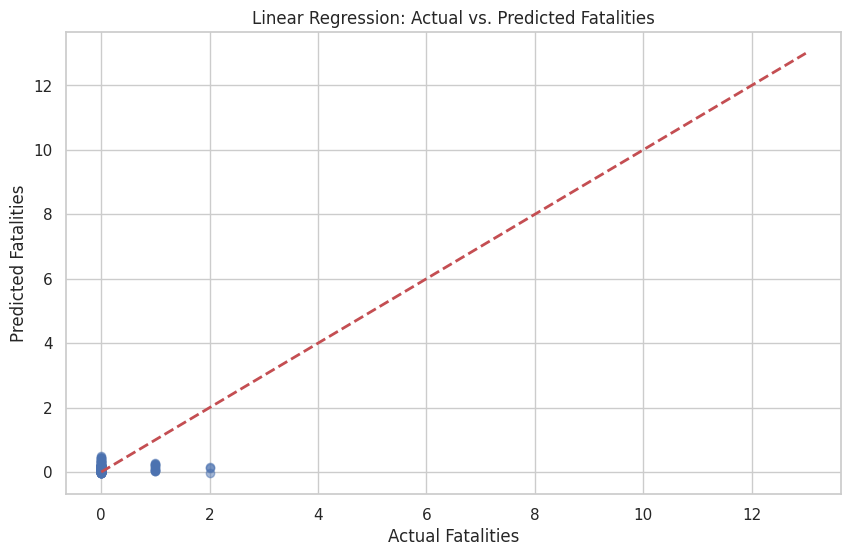

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define Features (X) and Target (y)
# We want to see if Bed Availability predicts Fatalities
features = [
    "Total Staffed Acute Care Beds Available",
    "Total Staffed ICU Beds Currently Available",
    "Acute Care Occupancy Rate",
    "Total New COVID-19 Admissions Reported"
]
target = "COVID-19 Patients Expired"

X = df_combined[features]
y = df_combined[target]

# Split Data into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("--- Linear Regression Model Results ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f} (Closer to 1.0 means better fit)")
print("\nFeature Coefficients (Impact on Fatalities):")
for feature, coef in zip(features, model.coef_):
    print(f" - {feature}: {coef:.4f}")

# Visualize Predictions vs Actuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # The "Perfect Prediction" line
plt.xlabel("Actual Fatalities")
plt.ylabel("Predicted Fatalities")
plt.title("Linear Regression: Actual vs. Predicted Fatalities")
plt.show()